# Neural Network Classification with TensorFlow - Exercises

### Replicate the model pictured in the TensorFlow Playground diagram usinf TensorFlow code. Compile it using Aadam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled, check a summary of the model.

In [1]:
import tensorflow as tf

In [2]:
# Recreate the model from TF Playground
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,1)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Summary of the model
model_1.summary()

2023-06-27 20:59:14.274707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-27 20:59:14.275627: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 6)              12        
                                                                 
 dense_1 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_2 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_3 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_4 (Dense)             (None, 1, 6)              42        
                                                                 
 dense_5 (Dense)             (None, 1, 1)              7         
                                             

### Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and the build a model to fit it at over 85% accuracy.

In [84]:
from sklearn.datasets import make_moons

# Create the dataset
dataset, labels = make_moons(
    n_samples=4096,
    shuffle=True,
    noise=0.202,
    random_state=42
)

# Inspect first 10 points in both data and labels
dataset[:10], labels[:10]

(array([[ 0.01381174,  0.86203699],
        [-0.53653285,  0.75495414],
        [ 2.0928444 ,  0.12923626],
        [-0.12973102,  0.71321369],
        [-0.37878943,  0.62506839],
        [-1.36932414,  0.32751097],
        [ 1.4790043 , -0.12702185],
        [-1.39634914,  0.23705917],
        [ 0.74450922,  0.29441599],
        [ 1.62979524, -0.47178577]]),
 array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1]))

<AxesSubplot: >

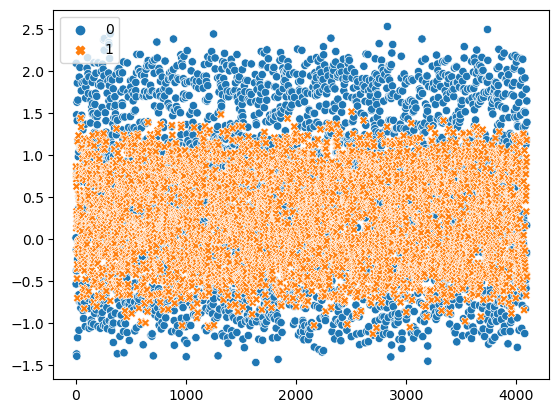

In [85]:
# Visualize the created data
import seaborn as sns
sns.scatterplot(dataset)

In [86]:
# Split the data for train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(3276, 820, 3276, 820)

In [87]:
# Create basic model
model_moons_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the basic model
model_moons_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fitting the model
history_moons_1 = model_moons_1.fit(X_train,
                                    y_train,
                                    epochs=50,
                                    verbose=2)

# Evaluating the model
model_moons_1.evaluate(X_test, y_test)

Epoch 1/50


2023-06-27 23:44:58.890053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 - 1s - loss: 0.4751 - accuracy: 0.8223 - 1s/epoch - 11ms/step
Epoch 2/50
103/103 - 1s - loss: 0.2808 - accuracy: 0.8813 - 653ms/epoch - 6ms/step
Epoch 3/50
103/103 - 1s - loss: 0.2333 - accuracy: 0.9032 - 649ms/epoch - 6ms/step
Epoch 4/50
103/103 - 1s - loss: 0.1755 - accuracy: 0.9338 - 601ms/epoch - 6ms/step
Epoch 5/50
103/103 - 1s - loss: 0.1337 - accuracy: 0.9521 - 593ms/epoch - 6ms/step
Epoch 6/50
103/103 - 1s - loss: 0.1141 - accuracy: 0.9597 - 599ms/epoch - 6ms/step
Epoch 7/50
103/103 - 1s - loss: 0.0976 - accuracy: 0.9655 - 614ms/epoch - 6ms/step
Epoch 8/50
103/103 - 1s - loss: 0.0960 - accuracy: 0.9679 - 597ms/epoch - 6ms/step
Epoch 9/50
103/103 - 1s - loss: 0.0928 - accuracy: 0.9689 - 605ms/epoch - 6ms/step
Epoch 10/50
103/103 - 1s - loss: 0.0903 - accuracy: 0.9704 - 622ms/epoch - 6ms/step
Epoch 11/50
103/103 - 1s - loss: 0.0843 - accuracy: 0.9698 - 594ms/epoch - 6ms/step
Epoch 12/50
103/103 - 1s - loss: 0.0890 - accuracy: 0.9683 - 644ms/epoch - 6ms/step
Epoch 13/50
10

2023-06-27 23:45:33.456312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 9ms/step - loss: 0.0897 - accuracy: 0.9610


[0.08972915261983871, 0.9609755873680115]

<AxesSubplot: >

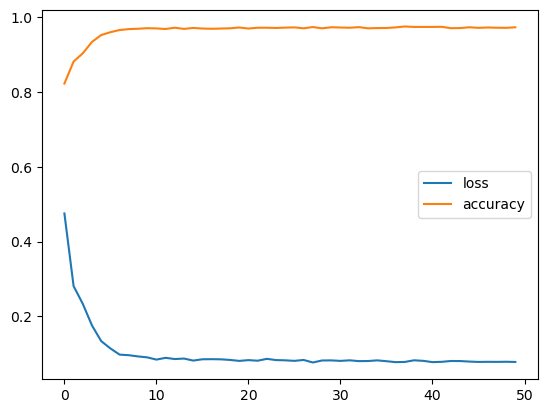

In [88]:
import pandas as pd
df = pd.DataFrame(history_moons_1.history)
df.plot()

Quite easily model achieved approx. 97% accuracy on created dataset. Looking at the plot, not much was probably possible due to distribution of the data. Probably changing the `make_moons()` arguments a bit would impact the final outcome (mostly `noise` parameter).

### Train a model to get 88%+ accuracy on the `fashion_mnist` dataset. Plot a confusion matrix to see the results afterwards.

In [58]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


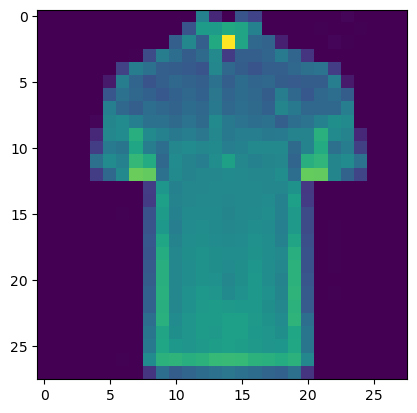

In [67]:
import matplotlib.pyplot as plt
import random

test_img = random.choice(train_data)
plt.imshow(test_img)

In [68]:
class_names = ['Tshirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Bag')

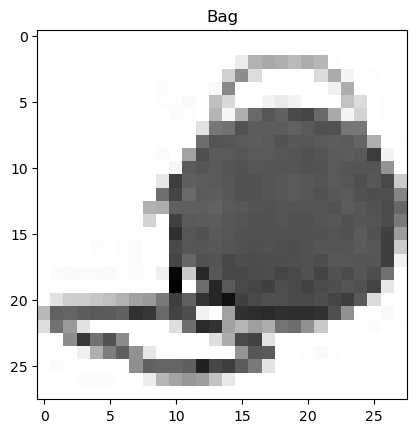

In [72]:
# Plot exemplary image and its label
import numpy as np
item_no = np.random.randint(0, 
                            len(train_data))

plt.imshow(train_data[item_no],
           cmap=plt.cm.binary)
plt.title(class_names[train_labels[item_no]])

In [89]:
# Normalize the data
train_data_normalized = train_data / 255.0
test_data_normalized = test_data / 255.0

In [101]:
# Basic multiclass classification model

tf.random.set_seed(42)

model_mnist_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # from 2D to 1D (matrix to vector)
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the mnist model
model_mnist_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_mnist_1 = model_mnist_1.fit(train_data_normalized,
                                    train_labels,
                                    epochs=15,
                                    validation_data=(test_data_normalized, test_labels),
                                    validation_steps=int(0.1*len(test_data_normalized)))

# Evaluate the model
model_mnist_1.evaluate(test_data_normalized, test_labels)

Epoch 1/15
   6/1875 [..............................] - ETA: 21s - loss: 2.2822 - accuracy: 0.0833 

2023-06-28 00:25:10.169841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1869/1875 [============================>.] - ETA: 0s - loss: 0.6437 - accuracy: 0.7734

2023-06-28 00:25:21.562021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.6431 - accuracy: 0.7737 - val_loss: 0.4559 - val_accuracy: 0.8380
Epoch 2/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4407 - accuracy: 0.8432 - val_loss: 0.4317 - val_accuracy: 0.8451
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4023 - accuracy: 0.8563 - val_loss: 0.4191 - val_accuracy: 0.8469
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3801 - accuracy: 0.8646 - val_loss: 0.3892 - val_accuracy: 0.8572
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3641 - accuracy: 0.8681 - val_loss: 0.3813 - val_accuracy: 0.8630
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3494 - accuracy: 0.8738 - val_loss: 0.3829 - val_accuracy: 0.8575
Epoch 7/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3428 - accuracy: 0.8740 - val_loss: 0.3813 - val_accuracy: 0.8

2023-06-28 00:28:34.856807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.3511 - accuracy: 0.8736


[0.35113850235939026, 0.8736000061035156]

In [102]:
# Basic multiclass classification model - v2

tf.random.set_seed(42)

model_mnist_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # from 2D to 1D (matrix to vector)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the mnist model
model_mnist_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_mnist_2 = model_mnist_2.fit(train_data_normalized,
                                    train_labels,
                                    epochs=15,
                                    validation_data=(test_data_normalized, test_labels),
                                    validation_steps=int(0.1*len(test_data_normalized)))

# Evaluate the model
model_mnist_2.evaluate(test_data_normalized, test_labels)

Epoch 1/15
   1/1875 [..............................] - ETA: 8:57 - loss: 2.3204 - accuracy: 0.0938

2023-06-28 00:28:37.156404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1869/1875 [============================>.] - ETA: 0s - loss: 0.5792 - accuracy: 0.7953

2023-06-28 00:28:47.604041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.5788 - accuracy: 0.7954 - val_loss: 0.4485 - val_accuracy: 0.8309
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4036 - accuracy: 0.8533 - val_loss: 0.4466 - val_accuracy: 0.8393
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3672 - accuracy: 0.8670 - val_loss: 0.4039 - val_accuracy: 0.8473
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3443 - accuracy: 0.8737 - val_loss: 0.3877 - val_accuracy: 0.8610
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3300 - accuracy: 0.8783 - val_loss: 0.3570 - val_accuracy: 0.8720
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3160 - accuracy: 0.8829 - val_loss: 0.3798 - val_accuracy: 0.8571
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3045 - accuracy: 0.8882 - val_loss: 0.3635 - val_accuracy: 0.8

2023-06-28 00:31:55.429510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step - loss: 0.3405 - accuracy: 0.8784


[0.34049326181411743, 0.8784000277519226]

In [103]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ProgbarLogger

early = EarlyStopping(monitor='val_loss',
                      patience=5,
                      verbose=1,
                      restore_best_weights=True)

reduce = ReduceLROnPlateau(monitor='val_loss',
                           factor=0.1,
                           patience=2,
                           verbose=1)

In [104]:
# Basic multiclass classification model - v3 with callbacks

tf.random.set_seed(42)

model_mnist_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # from 2D to 1D (matrix to vector)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the mnist model
model_mnist_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_mnist_3 = model_mnist_3.fit(train_data_normalized,
                                    train_labels,
                                    epochs=15,
                                    validation_data=(test_data_normalized, test_labels),
                                    validation_steps=int(0.1*len(test_data_normalized)),
                                    callbacks=[early, reduce, ProgbarLogger()])

# Evaluate the model
model_mnist_3.evaluate(test_data_normalized, test_labels)

Epoch 1/15
      0/Unknown - 0s 0s/sample - loss: 2.2638 - accuracy: 0.2188

2023-06-28 00:31:58.402148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


      0/Unknown - 11s 0s/sample - loss: 0.5955 - accuracy: 0.7887

2023-06-28 00:32:09.320780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 14s 8ms/sample - loss: 0.5951 - accuracy: 0.7890 - val_loss: 0.4489 - val_accuracy: 0.8365 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/sample - loss: 0.4106 - accuracy: 0.8515 - val_loss: 0.4365 - val_accuracy: 0.8440 - lr: 0.0010
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/sample - loss: 0.3724 - accuracy: 0.8641 - val_loss: 0.4109 - val_accuracy: 0.8494 - lr: 0.0010
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/sample - loss: 0.3491 - accuracy: 0.8727 - val_loss: 0.3812 - val_accuracy: 0.8635 - lr: 0.0010
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/sample - loss: 0.3307 - accuracy: 0.8791 - val_loss: 0.3790 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/sample - loss: 0.3183 - accuracy: 0.8838 - val_loss: 0.3780 - val_accuracy: 0.8632 - lr: 0.0010
Epoch 7/15
1875/1875 [=============================

2023-06-28 00:35:16.922720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.3271 - accuracy: 0.8842


[0.3270559310913086, 0.8841999769210815]

In [105]:
# Basic multiclass classification model - v4 with callbacks

tf.random.set_seed(42)

model_mnist_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # from 2D to 1D (matrix to vector)
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
	tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_mnist_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_mnist_4 = model_mnist_4.fit(train_data_normalized,
                                    train_labels,
                                    epochs=20,
                                    validation_data=(test_data_normalized, test_labels),
                                    validation_steps=int(0.1*len(test_data_normalized)),
                                    callbacks=[early, reduce])

# Evaluate the model
model_mnist_4.evaluate(test_data_normalized, test_labels)

Epoch 1/20
   1/1875 [..............................] - ETA: 10:43 - loss: 2.3303 - accuracy: 0.0625

2023-06-28 00:35:19.370348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 0.6926 - accuracy: 0.7470

2023-06-28 00:35:32.663205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 17s 9ms/step - loss: 0.6921 - accuracy: 0.7472 - val_loss: 0.4677 - val_accuracy: 0.8323 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4494 - accuracy: 0.8401 - val_loss: 0.4678 - val_accuracy: 0.8304 - lr: 0.0010
Epoch 3/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4038 - accuracy: 0.8555 - val_loss: 0.4224 - val_accuracy: 0.8432 - lr: 0.0010
Epoch 4/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3763 - accuracy: 0.8662 - val_loss: 0.3859 - val_accuracy: 0.8592 - lr: 0.0010
Epoch 5/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3555 - accuracy: 0.8733 - val_loss: 0.3865 - val_accuracy: 0.8647 - lr: 0.0010
Epoch 6/20
1872/1875 [============================>.] - ETA: 0s - loss: 0.3414 - accuracy: 0.8773
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1875/1875 [==============================] - 1

2023-06-28 00:40:31.871081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.3303 - accuracy: 0.8823


[0.3302818238735199, 0.8823000192642212]

Two models reached and broke 88%+ barrier to pass the exercise. Previous ones were also very close to do so with high 87% results.